### Summary of EDA on the Titanic Dataset

The sinking of the Titanic is one of the most infamous shipwrecks in history. The Titanic dataset is one of the most well-known datasets used for classification tasks.

It contains details of passengers aboard the RMS Titanic, and the goal is to predict survival based on various factors.

In this challenge, we ask you to build a predictive model that answers the question:

“what sorts of people were more likely to survive?”

## **Dataset Overview:**
Columns:

* Survived: Binary indicator (0 = No, 1 = Yes), whether the passenger survived.
* Pclass: Passenger class (1st, 2nd, 3rd).
* Sex: Gender of the passenger.
* Age: Age of the passenger.
* Fare: The ticket price paid.
* Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).
* SibSp: Number of siblings/spouses aboard.
* Parch: Number of parents/children aboard.

In [1]:
# Import all important library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the dataset

titanic=pd.read_csv("/content/sample_data/titanic_train.csv")

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic.shape

(891, 12)

In [5]:
titanic.size

10692

In [6]:
titanic.ndim

2

In [8]:
titanic.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [9]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# **Unique Values**

In [11]:
titanic.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


# **Column wise unique values**

In [12]:
titanic["Pclass"].unique()

array([3, 1, 2])

In [13]:
titanic["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [14]:
titanic["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [15]:
titanic["Survived"].unique()

array([0, 1])

In [16]:
titanic["Sex"].unique()

array(['male', 'female'], dtype=object)

# **Check Duplicates**

In [17]:
titanic.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,False


In [18]:
titanic.duplicated().sum() # Because we don't have any duplicate values within the dataset

0

# Check Missing Values or Missing Values Handling

In [19]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
#total Null values or Missing Values.

titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [21]:
# Drop the cabin column as we can't use cabin column bcoz of huge missing values

titanic=titanic.drop(["Cabin"],axis=1)

In [22]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
# Find the avg age of all passanger

age_avg=titanic.Age.mean()

In [24]:
print(age_avg)

29.69911764705882


In [25]:
# Replace the missig age value with the mean age

titanic["Age"].replace(np.nan,age_avg,inplace=True)

<ipython-input-25-762239acb466>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["Age"].replace(np.nan,age_avg,inplace=True)


In [26]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


* For categorical Column (String Data) we can use the mode/frequency imputation

In [27]:
fiq=titanic.Embarked.dropna().mode()[0]

In [28]:
print(fiq)

S


In [30]:
titanic.Embarked.replace(np.nan,fiq,inplace=True)

In [31]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


* Now we have handled the Missing Values as well as Duplicated Values.

In [32]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Check all the Survived and Not Survived Passangers

In [33]:
import seaborn as sns

<Axes: xlabel='Survived', ylabel='count'>

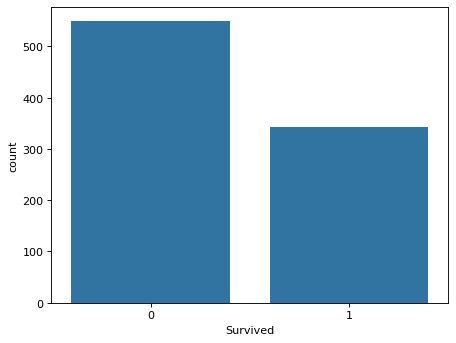

In [39]:
plt.figure(dpi=80)
sns.countplot(x="Survived", data=titanic)

In [35]:
titanic["Survived"].value_counts()  # Survival 0 = No, 1 = Yes

,count
Survived,
0,549
1,342


<Axes: xlabel='Sex', ylabel='count'>

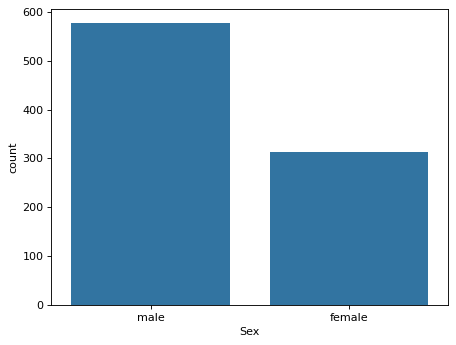

In [38]:
# Check how many passangers are male or female

plt.figure(dpi=80)
sns.countplot(x="Sex", data=titanic)

<Axes: xlabel='Survived', ylabel='count'>

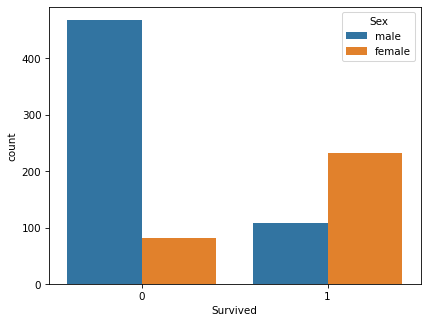

In [40]:
 # Total survival rate with respect to the  male female ratio.

 plt.figure(dpi=75)
 sns.countplot(x="Survived", hue="Sex", data=titanic)

In [42]:
# Find how many male female survived

men_survival=titanic[titanic.Sex=="male"]["Survived"].count()

print(men_survival)

577


In [43]:
female_survival=titanic[titanic.Sex=="female"]["Survived"].count()

print(female_survival)

314


# **Survival Rate for male**

In [47]:
men_survival=titanic[titanic.Sex=="male"]["Survived"] #only male passangers

men_survival_rate=sum(men_survival)/len(men_survival)*100

In [48]:
print(men_survival)
print(men_survival_rate)
print(sum(men_survival))

0      0
4      0
5      0
6      0
7      0
      ..
883    0
884    0
886    0
889    1
890    0
Name: Survived, Length: 577, dtype: int64
18.890814558058924
109


# Key Insight

* Total male passangers = 577
* Total male passanger survived = 109
* Only 18.8908% male passangers survived

In [49]:
#total number of male survived #method 1

titanic[(titanic.Sex=="male")&(titanic.Survived==1)].count()

,0
PassengerId,109
Survived,109
Pclass,109
Name,109
Sex,109
Age,109
SibSp,109
Parch,109
Ticket,109
Fare,109


In [50]:
#find total survival rate of male method 2

len(titanic[(titanic.Sex=="male") & (titanic.Survived==1)])

109

# **Female Survival Rate**

In [51]:
female_survival = titanic[titanic.Sex=="female"]["Survived"] # Only Female Passangers

female_survival_rate = sum(female_survival)/len(female_survival)*100

In [53]:
print(female_survival)
print(sum(female_survival))
print(female_survival_rate)

1      1
2      1
3      1
8      1
9      1
      ..
880    1
882    0
885    0
887    1
888    0
Name: Survived, Length: 314, dtype: int64
233
74.20382165605095


# **Key Insight**

* Total female passangers = 314
* Total female passanger survived = 233
* Only 74.203% female passangers survived


# GroupBY

* Use groupby to get an undersatnding how many people survived according to male and female

In [54]:
res=titanic.groupby("Sex")["Survived"].value_counts()

In [55]:
print(res)

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64


* Get the above result in % formate

In [56]:
res=titanic.groupby("Sex")["Survived"].value_counts(normalize=True)

In [57]:
print(res)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: proportion, dtype: float64


In [58]:
print("Total Percentgae of Women Survived", res[0]*100)

Total Percentgae of Women Survived 74.20382165605095


<ipython-input-58-ae39b2da46c6>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Total Percentgae of Women Survived", res[0]*100)


In [59]:
print("Total Percentgae of Women Not Survived", res[1]*100)

Total Percentgae of Women Not Survived 25.796178343949045


<ipython-input-59-27f6ffc161fe>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Total Percentgae of Women Not Survived", res[1]*100)


In [62]:
print("Total Percentgae of Men Not Survived", res[2]*100)

Total Percentgae of Men Not Survived 81.10918544194108


<ipython-input-62-d7c1d3ff8c48>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Total Percentgae of Men Not Survived", res[2]*100)


In [63]:
print("Total Percentgae of Men Survived", res[3]*100)

Total Percentgae of Men Survived 18.890814558058924


<ipython-input-63-ded3de41b601>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Total Percentgae of Men Survived", res[3]*100)


# Survival Rate Based on Passanger class

**Survived vs Pclass**

<Axes: xlabel='Survived', ylabel='count'>

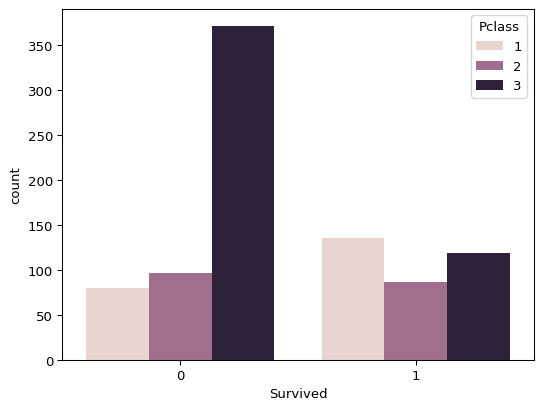

In [64]:
plt.figure(dpi=95)
sns.countplot(x="Survived",hue="Pclass",data=titanic)

# Class wise survival rate

In [71]:
res1=titanic.groupby("Pclass")["Survived"].value_counts(normalize=True)

In [72]:
print(res1)

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: proportion, dtype: float64


In [74]:
res1=titanic.groupby("Pclass")["Survived"].value_counts()
print(res1)

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64


In [77]:
# Total people with Pclass 1 that are in survived cloumn.

total_survived = titanic[titanic.Pclass==1]["Survived"]

#percentage of total survival rate, those who are survived from pclass 1

total_survival_rate = sum(total_survived) / len(total_survived)*100

In [88]:
print("Toal Passanger in class1", len(total_survived)) # len of Pclass1

print("Total Passanger Survived in class1", sum(total_survived)) # Sum of total survival people

print("Total Survival Rate in class1", total_survival_rate) # percentage of all survived people from class 1

Toal Passanger in class1 491
Total Passanger Survived in class1 119
Total Survival Rate in class1 24.236252545824847


In [82]:
# Total people with Pclass 2 that are in survived cloumn.

total_survived=titanic[titanic.Pclass==2]["Survived"]

#percentage of total survival rate, those who are survived from pclass 2

total_survival_rate=sum(total_survived)/len(total_survived)*100

In [85]:
print("Total Passanger in class2", len(total_survived)) # len of Pclass2

print("Total Passanger Survived in class2", sum(total_survived)) # Sum of total survival people

print("Total Survival Rate in class2", total_survival_rate) # percentage of all survived people from class 2

Toal Passanger in class2 184
Total Passanger Survived in class 87
Total Survival Rate in class2 47.28260869565217


In [87]:
# Total people with Pclass 3 that are in survived cloumn.

total_survived=titanic[titanic.Pclass==3]["Survived"]

#percentage of total survival rate, those who are survived from pclass 3

total_survival_rate=sum(total_survived)/len(total_survived)*100

# len of Pclass3
print("Total Passanger in class3", len(total_survived))

# Sum of total survival people from class 3
print("Total Passanger Survived in class3", sum(total_survived))

# percentage of all survived people from class3
print("Total Survival Rate in class3", total_survival_rate)

Total Passanger in class3 491
Total Passanger Survived in class3 119
Total Survival Rate in class3 24.236252545824847


# Key Insight

* Total Survival Rate in class1 62.96296296296296

* Total Survival Rate in class2 47.28260869565217

* Total Survival Rate in class3 24.236252545824847


* We have seen that maximum Casuality happen in class 3



# Survival rate based on Embarked Data

<Axes: xlabel='Survived', ylabel='count'>

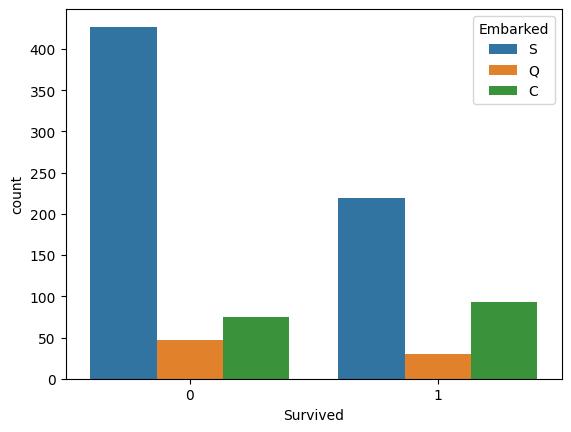

In [89]:
plt.figure(dpi=100)
sns.countplot(x="Survived", hue="Embarked", data=titanic)

In [90]:
titanic["Embarked"].value_counts()

,count
Embarked,
S,646
C,168
Q,77


# Key Insight

* 168 people board from C= Cherbourg
* 77 People board from Q= Queenstown
* 646 people board from S = Southampton

In [93]:
# Survival rate of all passengers who embarked from Southampton (S)

total_survived=titanic[titanic.Embarked=="S"]["Survived"]

total_survival_rate=sum(total_survived)/len(total_survived)*100

# Length of total passangers from Southampton (S)
print("Total passangers embarked from Southampton(S)", len(total_survived))

# Total survived passangers embarked from Southampton (S)
print("Total Passangers survived who embarked from Southampton", sum(total_survived))

# Survival rate of all passengers who embarked from Southampton (S)
print("Survival rate of all passengers who embarked from Southampton (S)",total_survival_rate)

Total passangers embarked from Southampton(S) 646
Total Passangers survived who embarked from Southampton 219
Survival rate of all passengers who embarked from Southampton (S) 33.90092879256966


In [95]:
# Survival rate of all passengers who embarked from Cherbourg (C)

total_survived=titanic[titanic.Embarked=="C"]["Survived"]

total_survival_rate=sum(total_survived)/len(total_survived)*100

# Length of total passangers from Cherbourg (C)
print("Total passangers embarked from Cherbourg (C)", len(total_survived))

# Total survived passangers embarked from Cherbourg (C)
print("Total Passangers survived who embarked from Cherbourg (C)", sum(total_survived))

# Survival rate of all passengers who embarked from Cherbourg (C)
print("Survival rate of all passengers who embarked from Cherbourg (C)",total_survival_rate)

Total passangers embarked from Cherbourg (C) 168
Total Passangers survived who embarked from Cherbourg (C) 93
Survival rate of all passengers who embarked from Cherbourg (C) 55.35714285714286


In [96]:
total_survived=titanic[titanic.Embarked=="Q"]["Survived"]
total_survival_rate=sum(total_survived)/len(total_survived)*100
print(len(total_survived))
print(sum(total_survived))
print(total_survival_rate)

77
30
38.961038961038966


In [97]:
res2=titanic.groupby("Embarked")["Survived"].value_counts()
print(res2)


Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           219
Name: count, dtype: int64


In [98]:
res2=titanic.groupby("Embarked")["Survived"].count()
print(res2)

Embarked
C    168
Q     77
S    646
Name: Survived, dtype: int64


In [99]:
res2=titanic.groupby("Embarked")["Survived"].value_counts(normalize=True)
print(res2)

Embarked  Survived
C         1           0.553571
          0           0.446429
Q         0           0.610390
          1           0.389610
S         0           0.660991
          1           0.339009
Name: proportion, dtype: float64


**Survival Based on SibSp**

<Axes: xlabel='Survived', ylabel='count'>

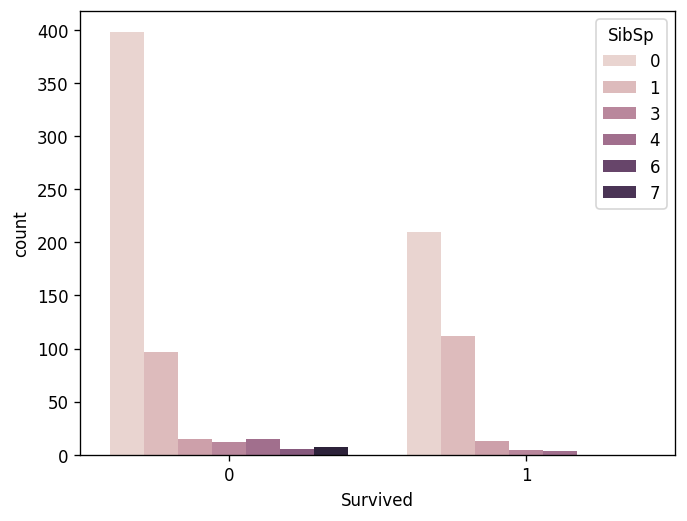

In [100]:
plt.figure(dpi=120)
sns.countplot(x="Survived",hue="SibSp",data=titanic)

In [101]:
res3=titanic.groupby("SibSp")["Survived"].value_counts()
print(res3)

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: count, dtype: int64


In [102]:
res3=titanic.groupby("SibSp")["Survived"].value_counts(normalize=True)
print(res3)

SibSp  Survived
0      0           0.654605
       1           0.345395
1      1           0.535885
       0           0.464115
2      0           0.535714
       1           0.464286
3      0           0.750000
       1           0.250000
4      0           0.833333
       1           0.166667
5      0           1.000000
8      0           1.000000
Name: proportion, dtype: float64


Survial based on Fare

<Axes: xlabel='Survived', ylabel='Fare'>

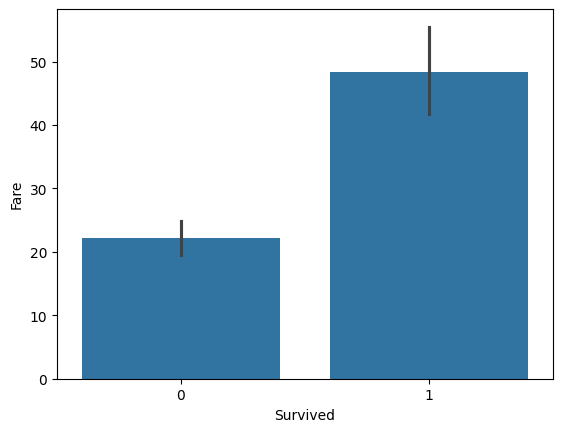

In [105]:
plt.figure(dpi=100)
sns.barplot(x="Survived",y="Fare",data=titanic)

<Axes: xlabel='Survived', ylabel='Fare'>

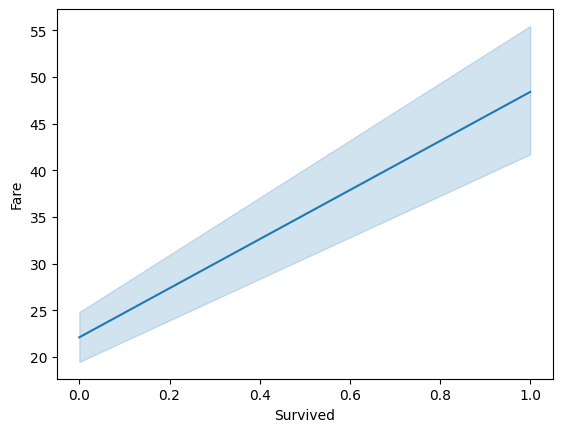

In [106]:
plt.figure(dpi=100)
sns.lineplot(x="Survived",y="Fare",data=titanic)

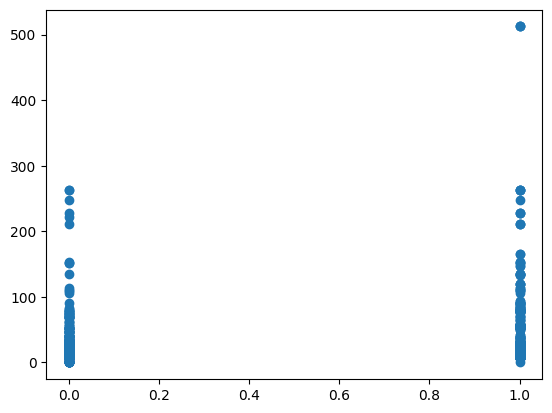

In [107]:
x=titanic["Survived"] #not workable
y=titanic["Fare"]
plt.figure(100)
plt.scatter(x,y)

<Axes: xlabel='Fare'>

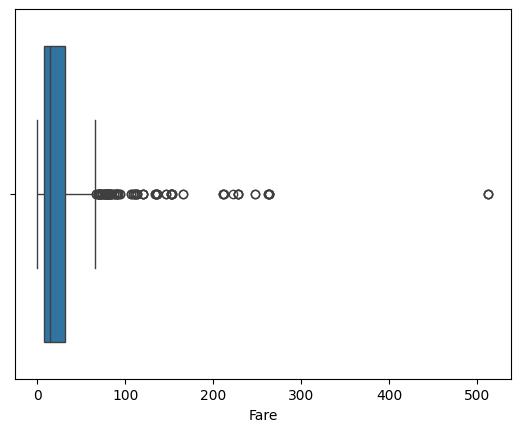

In [108]:
plt.figure(dpi=100)
sns.boxplot(x="Fare",data=titanic)

# Survived Passangers based on Age Group

<Axes: xlabel='Age'>

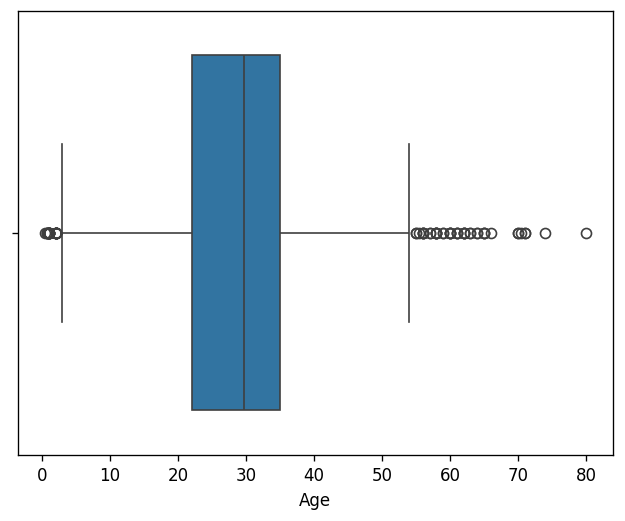

In [109]:
plt.figure(dpi=120)
sns.boxplot(x="Age",data=titanic)

<Axes: xlabel='Age'>

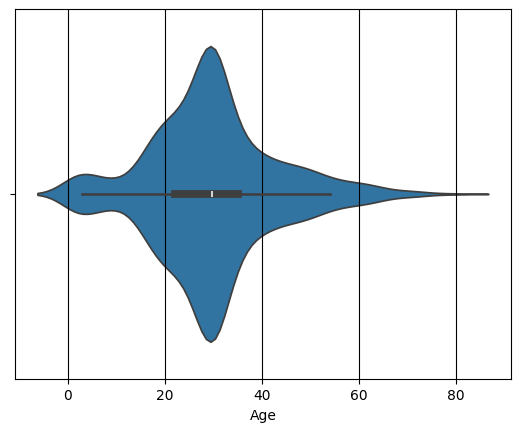

In [110]:
plt.figure(dpi=100)
plt.grid(color="Black")
sns.violinplot(x="Age",data=titanic)

In [111]:
titanic.groupby(["Sex","Survived"])["Age"].mean()

Sex     Survived
female  0           26.023272
        1           28.979263
male    0           31.175224
        1           27.631705
Name: Age, dtype: float64

In [112]:
 #342 survived 549 not able to survived, 0 for non survived and 1 for survived

titanic["Survived"].value_counts()

,count
Survived,
0,549
1,342


In [113]:
 #got to know about all survived and non survived passangers

titanic["Survived"].value_counts().keys()

Index([0, 1], dtype='int64', name='Survived')

In [114]:
#got to know about passanger class, most people were in 3rd class and lowest were in 2nd class.

titanic["Pclass"].value_counts()

,count
Pclass,
3,491
1,216
2,184


In [115]:
#got to know how many male and female were their in the dataset.

titanic["Sex"].value_counts()

,count
Sex,
male,577
female,314


In [118]:
#got to know if we have null value or not


(titanic["Survived"].isnull())

,Survived
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,False


In [119]:
 #no null value are in the Survived

sum(titanic["Survived"].isnull())

0

In [120]:
#got to know if we have null value or not

titanic["Age"].isnull()

,Age
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,False
